## Final Project: The best neighborhood in Pittsburgh

Group name: WEJ

Group members:Weini Xie He, Ethan Guan, Jingtao Zhao 

## Introduction

We believe that the best neighborhood should be the most stable neighborhood, where people can get their basic needs met, feel safe in their surroundings, and have access to transportation. So, we looked at the data that shows the percentage of people with salaries, the crime data, and the traffic data in the neighborhood.

## The Metric:

## Crime Data

In [73]:
import pandas as pd
police = pd.read_csv("PittsburghPoliceArrestData.csv", usecols = ['INCIDENTNEIGHBORHOOD'])
police_dict = {}
i = 0
while i < 58322:
    item = police.loc[i,'INCIDENTNEIGHBORHOOD']
    if item in police_dict:
        police_dict[item]+=1
    else:
        police_dict[item]=1
    i += 1
final = pd.Series(police_dict, name = "place")

In [74]:
final = final.sort_values()[:]

In [75]:
final.head(20)

Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Ridgemont                       32
Regent Square                   32
Chartiers City                  38
Swisshelm Park                  38
New Homestead                   38
St. Clair                       45
East Carnegie                   47
Outside County                  49
Outside State                   57
Summer Hill                     63
Oakwood                         78
Golden Triangle/Civic Arena     83
Hays                            98
Windgap                        103
Fairywood                      108
Mount Oliver                   111
Name: place, dtype: int64

## Visualization

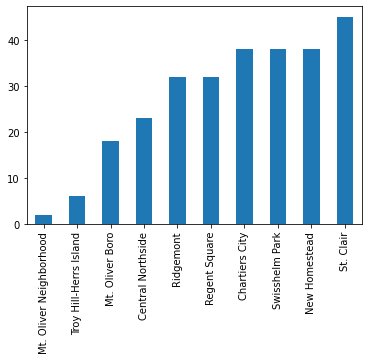

In [44]:
final.sort_values(ascending=True)[:10].plot.bar()

## Salaries data

I decided to look at the percent of people that have wages or salaries as one of the factors to determine the most stable neighborhood. This is an important factor because in order to be stable, people in the neighborhood should be able to obtain their basic needs for living, and a salary is money that people can use to buy their needs. 

In [26]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

#open the salary data file
salary = pd.read_csv("salary.csv")
salary.head(5)

Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
0   Allegheny Center   1             870.0                93.000000   
1     Allegheny West   2             146.0                36.000000   
2          Allentown   3            1069.0               132.457540   
3          Arlington   4             701.0               104.465305   
4  Arlington Heights   5             144.0                59.000000   

   Estimate; Total: - With wage or salary income  \
0                                          635.0   
1                                          119.0   
2                                          736.0   
3                                          570.0   
4                                           99.0   

   Margin of Error; Total: - With wage or salary income  \
0                                          91.000000      
1                                          35.000000      
2                                         140.335313      
3                                         106.273233      
4                                          60.000000      

   Estimate; Total: - No wage or salary income  \
0                                        235.0   
1                                         27.0   
2                                        333.0   
3                                        131.0   
4                                         45.0   

   Margin of Error; Total: - No wage or salary income  
0                                          59.000000   
1                                          20.000000   
2                                          97.493590   
3                                          45.199558   
4                                          30.000000

## Visualization

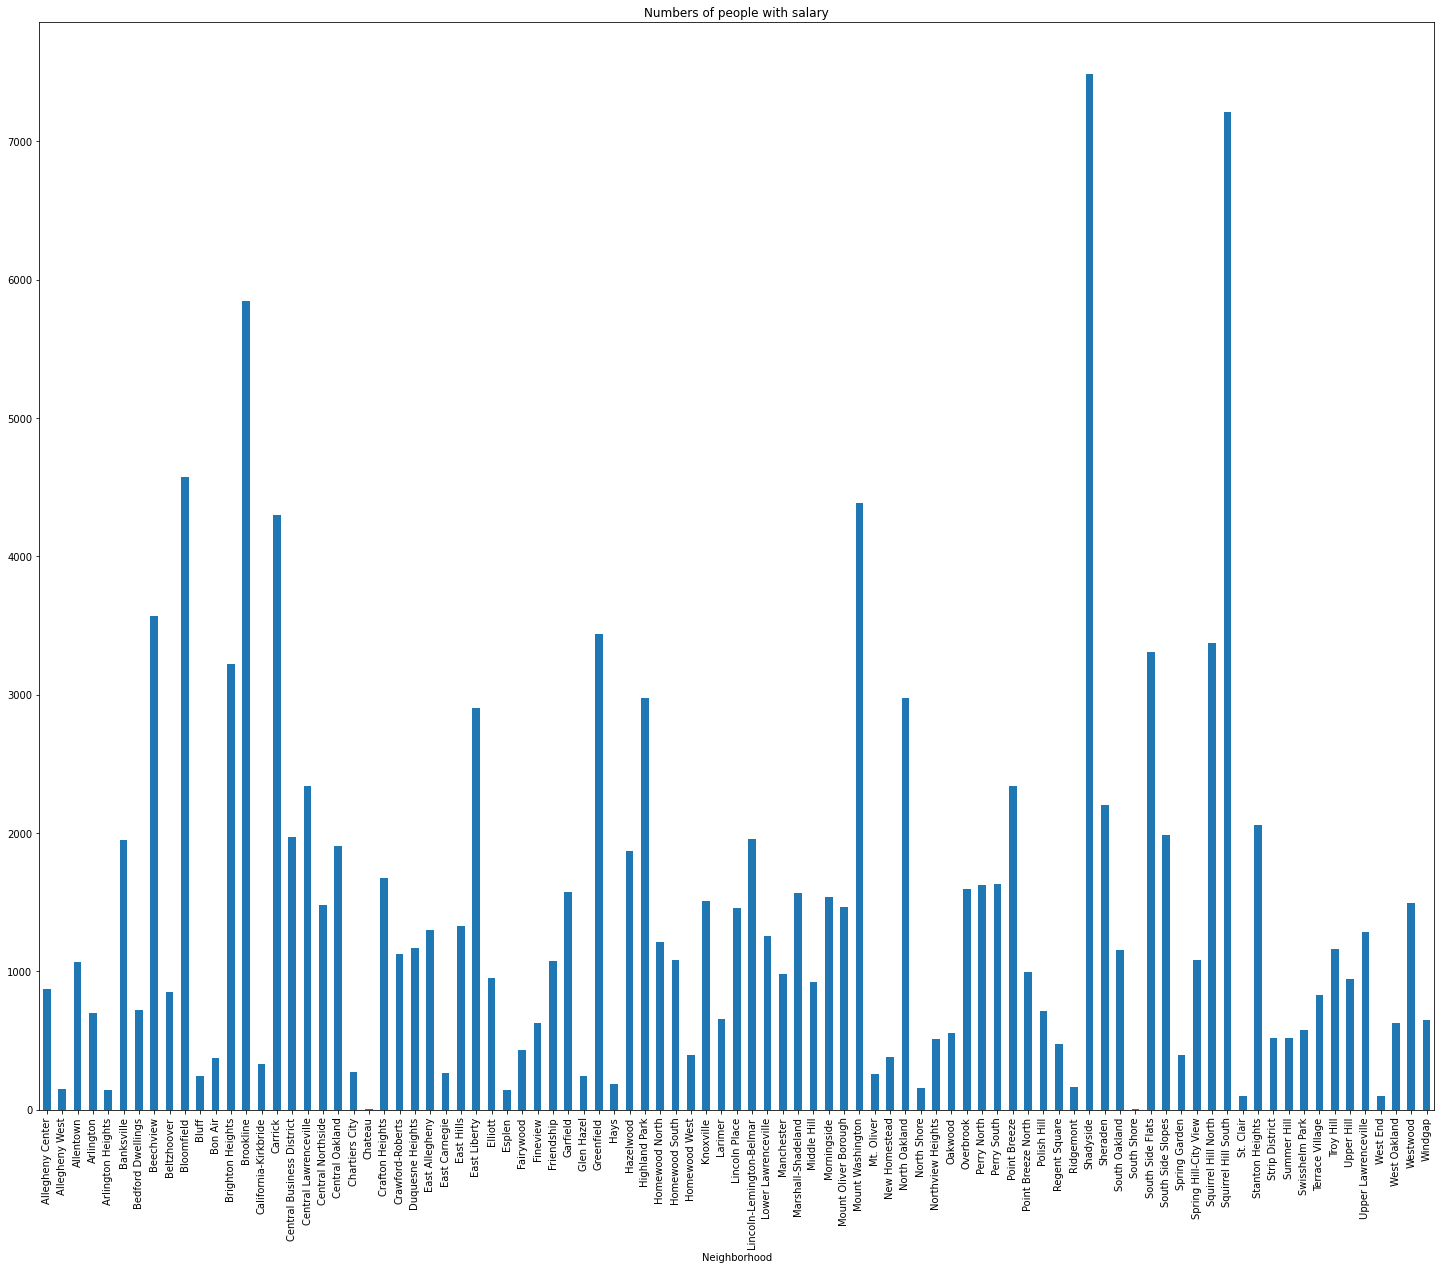

In [27]:
# make the index to neighborhood names
salary = salary.set_index('Neighborhood')
# create a bar visualization
salary['Estimate; Total:'].plot(kind="bar", title=("Numbers of people with salary"), figsize=(25,20))

In [28]:
#shows only the neighborhood name and the total number of people
salary = salary.iloc[0:, 0:3]
#show the neighborhood with the larget number of people with salary
salary.nlargest(5, 'Estimate; Total:',keep='first')

Id  Estimate; Total:  Margin of Error; Total:
Neighborhood                                                      
Shadyside            69            7484.0               360.919659
Squirrel Hill South  78            7211.0               332.601864
Brookline            14            5843.0               327.694980
Bloomfield           10            4571.0               205.494525
Mount Washington     54            4385.0               249.523546

But since the total population of each neighborhood is different, we should look at the percentage of each person with salary in the neighborhood for a more accurate list.

In [29]:
#open the total-population data file
population = pd.read_csv("total-population.csv")
#show the first 10 datas
population.head(5)

Neighborhood  Id  Estimate; Total  Margin of Error; Total
0   Allegheny Center   1           1411.0              196.000000
1     Allegheny West   2            343.0               96.000000
2          Allentown   3           2558.0              449.773276
3          Arlington   4           1852.0              348.188168
4  Arlington Heights   5            272.0              126.000000

## Visualization

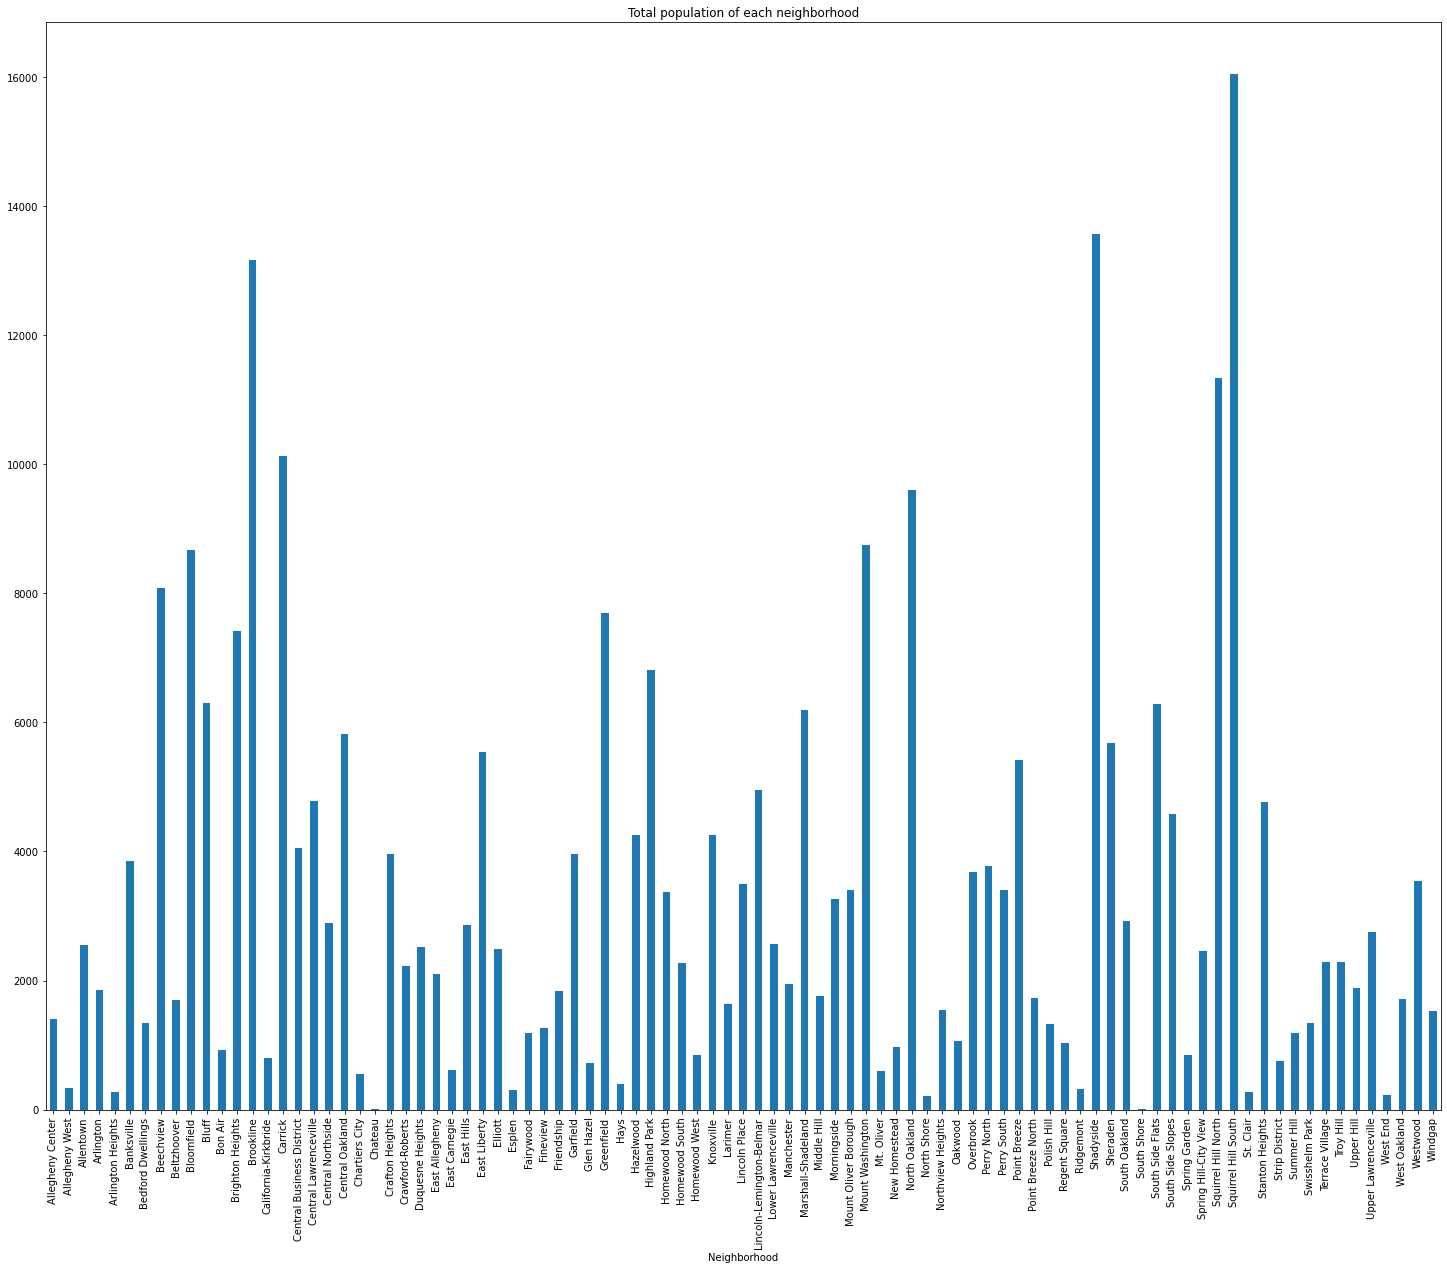

In [30]:
# make the index to neighborhood names
population = population.set_index('Neighborhood')
# create a bar visualization
population['Estimate; Total'].plot(kind="bar", title=("Total population of each neighborhood"), figsize=(25,20))

In [31]:
#shows only the neighborhood name and the total number of people
population = population.iloc[0:, 0:2]
#show the neighborhood with largest population
population.nlargest(10, 'Estimate; Total',keep='first')

Id  Estimate; Total
Neighborhood                            
Squirrel Hill South  78          16042.0
Shadyside            69          13562.0
Brookline            14          13160.0
Squirrel Hill North  77          11336.0
Carrick              16          10122.0
North Oakland        57           9602.0
Mount Washington     54           8743.0
Bloomfield           10           8669.0
Beechview             8           8078.0
Greenfield           37           7690.0

Now that we have both the neighborhood with numbers of people with salary data and the top 10 neighborhood with the largest population data, we can calculate the percentage of each person in the neighborhood with salary.

In [65]:
#calculate the percentage of each person with salary in the neighborhood
#create a new dataframe to store needed datas
percentage = pd.DataFrame()
#use the data from the salary data file and the data from the total population file
#create new columns
percentage['Number of people with salary']= salary['Estimate; Total:']
percentage['Total population']= population['Estimate; Total']
#calculate the percentage by dividing the total population by the number of people with salary 
percentage['Percent']= (percentage['Number of people with salary']/percentage['Total population'])*100
percentage['Id'] = population['Id']
#show the neighborhood with the larget percent of each person with salary
percentage.nlargest(10, 'Percent',keep='first')

Number of people with salary  Total population  \
Neighborhood                                                         
Chateau                                      3.0               3.0   
North Shore                                154.0             205.0   
Strip District                             520.0             747.0   
South Shore                                  8.0              12.0   
East Allegheny                            1302.0            2095.0   
Allegheny Center                           870.0            1411.0   
Friendship                                1074.0            1840.0   
Point Breeze North                         996.0            1732.0   
Shadyside                                 7484.0           13562.0   
Bedford Dwellings                          723.0            1349.0   

                       Percent  Id  
Neighborhood                        
Chateau             100.000000  22  
North Shore          75.121951  58  
Strip District       69.611780  81  
South Shore          66.666667  72  
East Allegheny       62.147971  26  
Allegheny Center     61.658398   1  
Friendship           58.369565  34  
Point Breeze North   57.505774  65  
Shadyside            55.183601  69  
Bedford Dwellings    53.595256   7

Top neighborhoods with the largest percentage:
As you can see the top 10 neighborhoods with the highest percent of person with salary are Chateau, North Shore, Strip District, South Shore, East Alleghney, Allegheny Center, Friendship, Point Breeze North, Shadyside, and Bedford Dwellings.

## Traffic Data


In [76]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

In [77]:
#open the average daily car traffic data file
cartraffic = pd.read_csv("car_traffic.csv")
#show the first 10 datas
cartraffic.head(10)


id  device_id    record_oid count_start_date count_end_date  \
0  1011743669         85  1.445865e+09       2019-04-18     2019-04-26   
1  1026101993        140  1.121444e+09       2019-01-24            NaN   
2  1032382575         11  1.539893e+09       2018-08-28     2018-09-04   
3   103627606          9  7.341951e+08       2018-07-17     2018-08-01   
4  1039546167        144           NaN              NaN            NaN   
5  1041392556         76  5.713472e+08       2019-03-22     2019-03-29   
6  1047444948         17  1.366891e+09       2018-10-18            NaN   
7  1053645660         87  8.042089e+08       2019-04-18     2019-04-26   
8  1073440033        156  1.736165e+09       2017-07-28            NaN   
9  1092885547        143           NaN              NaN            NaN   

   average_daily_car_traffic  average_daily_bike_traffic counter_number  \
0                     4949.0                         NaN              6   
1                        NaN                         NaN            NaN   
2                        NaN                         NaN            NaN   
3                     2741.0                         NaN            NaN   
4                        NaN                         NaN            NaN   
5                     1046.0                         NaN              2   
6                        NaN                         NaN            NaN   
7                     3015.0                         NaN              4   
8                        NaN                         NaN            NaN   
9                        NaN                         NaN            NaN   

         counter_type  speed_limit  ...  longitude   latitude  \
0            StatTrak         25.0  ... -79.967772  40.455733   
1  Intersection Study          NaN  ... -79.952249  40.466157   
2                 NaN         35.0  ... -80.076469  40.460717   
3            StatTrak         25.0  ... -79.914335  40.437379   
4                 NaN          NaN  ... -80.019211  40.490794   
5            StatTrak         25.0  ... -80.014234  40.458106   
6                 NaN         25.0  ... -79.942273  40.446282   
7            StatTrak         25.0  ... -79.964592  40.457119   
8  Intersection Study          NaN  ... -79.960385  40.438983   
9                 NaN          NaN  ... -79.920958  40.467294   

            neighborhood  council_district  ward        tract  \
0            Polish Hill               7.0   6.0  42003060500   
1  Central Lawrenceville               7.0   9.0  42003090200   
2                Windgap               2.0  28.0  42003563000   
3    Squirrel Hill South               5.0  14.0  42003140800   
4            Perry North               1.0  26.0  42003260200   
5      Central Northside               6.0  25.0  42003250300   
6    Squirrel Hill North               8.0  14.0  42003140100   
7            Polish Hill               7.0   6.0  42003060500   
8        Central Oakland               3.0   4.0  42003040500   
9           East Liberty               9.0  11.0  42003111300   

   public_works_division pli_division  police_zone  fire_zone  
0                    6.0          6.0          2.0        2-6  
1                    2.0          9.0          2.0        3-6  
2                    5.0         28.0          6.0       1-16  
3                    3.0         14.0          4.0       2-18  
4                    1.0         26.0          1.0       1-15  
5                    1.0         25.0          1.0       1-21  
6                    3.0         14.0          4.0       2-26  
7                    6.0          6.0          2.0        2-6  
8                    3.0          4.0          4.0       2-14  
9                    2.0         11.0          5.0        3-8  

[10 rows x 25 columns]

In [78]:
daily_car_traffic = pd.DataFrame()
daily_car_traffic['average_daily_car_traffic'] = cartraffic['average_daily_car_traffic']
daily_car_traffic['neighborhood_name'] = cartraffic['neighborhood']
daily_car_traffic.head(10)

average_daily_car_traffic      neighborhood_name
0                     4949.0            Polish Hill
1                        NaN  Central Lawrenceville
2                        NaN                Windgap
3                     2741.0    Squirrel Hill South
4                        NaN            Perry North
5                     1046.0      Central Northside
6                        NaN    Squirrel Hill North
7                     3015.0            Polish Hill
8                        NaN        Central Oakland
9                        NaN           East Liberty

## Visualization

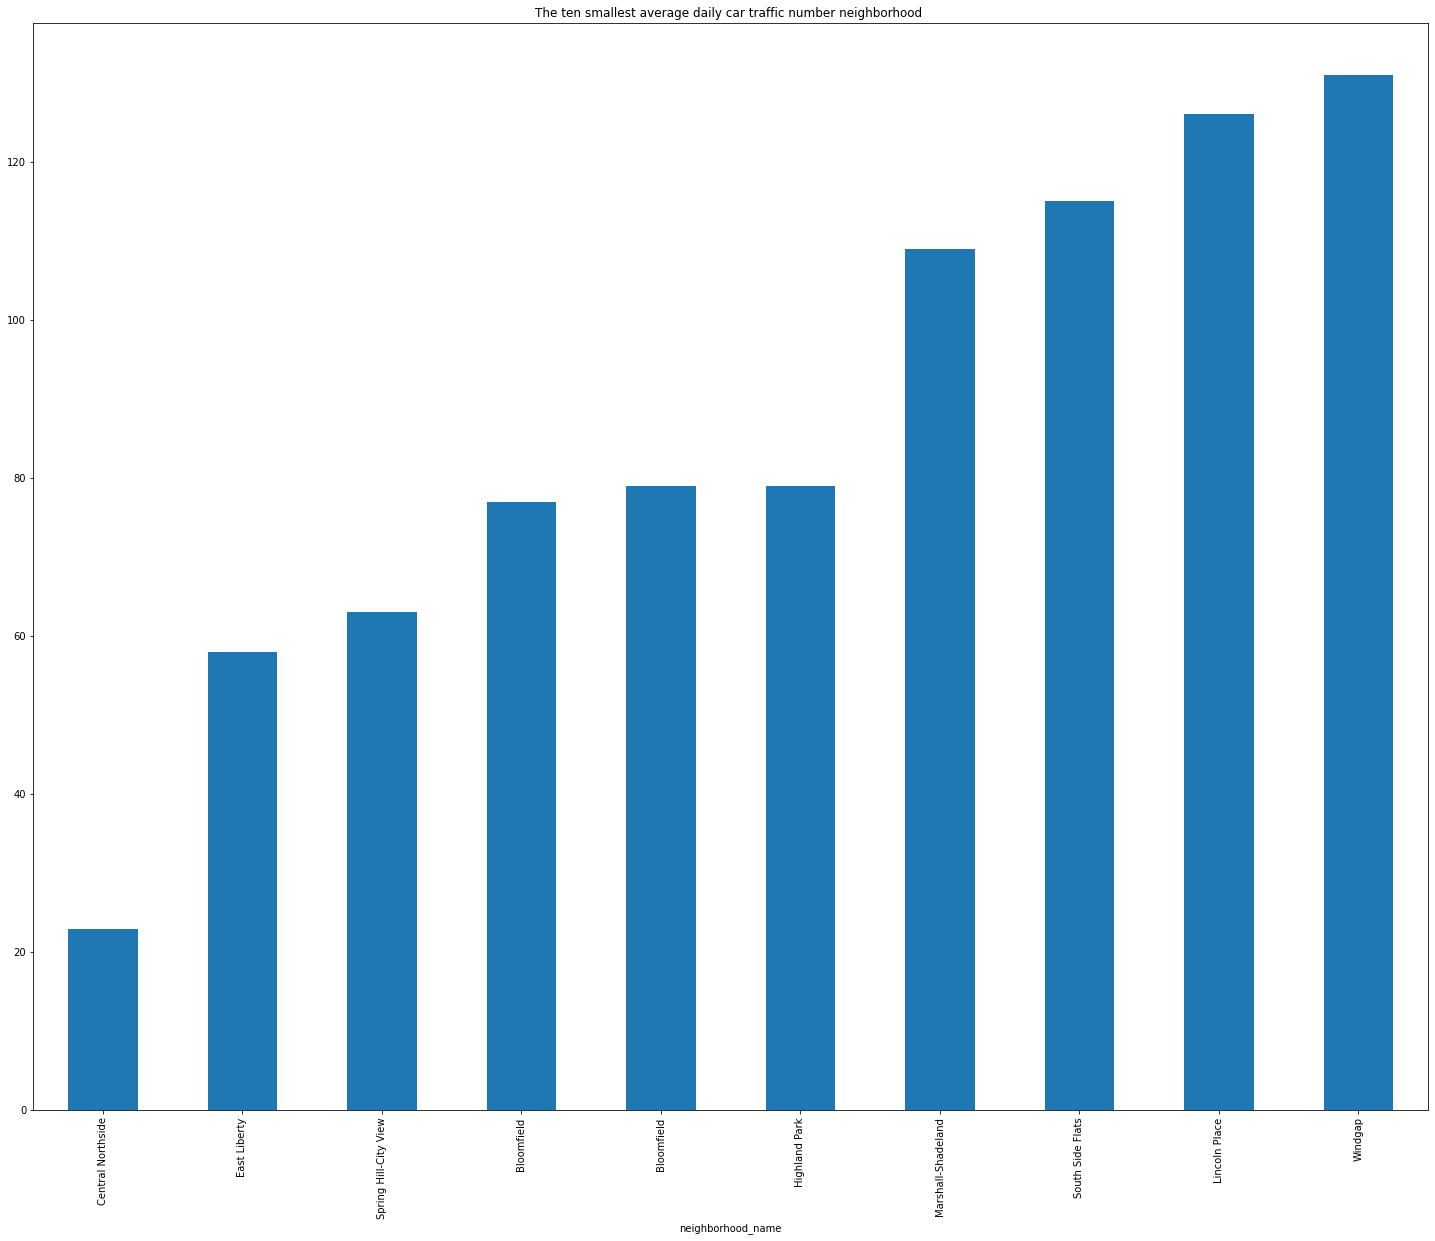

In [79]:
daily_car_traffic1 = daily_car_traffic.nsmallest(10, 'average_daily_car_traffic', keep= 'first')
#make the index to neighborhood names
daily_car_traffic1 = daily_car_traffic1.set_index('neighborhood_name')
# create a bar visualization
daily_car_traffic1['average_daily_car_traffic'].plot(kind="bar", title=("The ten smallest average daily car traffic number neighborhood "), figsize=(25,20))